In [1]:
import sys
sys.path.append('..')

import torch, torchuq
from torchuq.evaluate import distribution 
from torchuq.transform.conformal import ConformalCalibrator 
from torchuq.dataset import create_example_regression 

In this very simple example, we create a synthetic prediction (which is a set of Gaussian distributions), plot them, and recalibrate them with conformal calibration. `

In [2]:
predictions, labels = create_example_regression()

The example predictions are intentially incorrect (i.e. the label is not drawn from the predictions). 
We will recalibrate the distribution with a powerful recalibration algorithm called conformal calibration. It takes as input the predictions and the labels, and learns a recalibration map that can be applied to new data (here for illustration purposes we apply it to the original data). 

In [3]:
calibrator = ConformalCalibrator(input_type='distribution', interpolation='linear')
calibrator.train(predictions, labels)
adjusted_predictions = calibrator(predictions)

We can plot these distribution predictions as a sequence of density functions, and the labels as the cross-shaped markers. 
As shown by the plot, the original predictions have systematically incorrect variance and mean, which is fixed by the recalibration algorithm. 

<AxesSubplot:xlabel='sample index', ylabel='label value'>

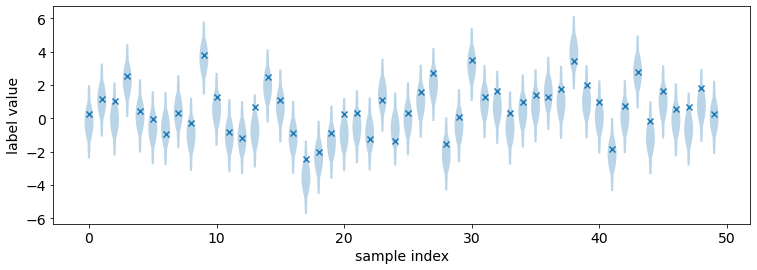

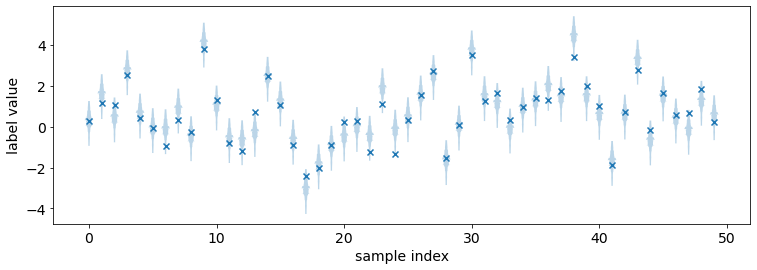

In [5]:
distribution.plot_density_sequence(predictions, labels, smooth_bw=10);
distribution.plot_density_sequence(adjusted_predictions, labels, smooth_bw=10);